In [49]:
from sklearn.neural_network import MLPClassifier
import pygame 
import numpy as np

import numpy.random as rd

In [126]:
def direction(a):
    b = 1 - a**2
    return np.sqrt(b)

def distance(a,b):
    return np.sqrt((b["x"]-a["x"])**2 + (b["y"]-a["y"])**2)

def findCloseFood(blop,idBlop):
    d1 = w+h,
    d2 = w+h
    f1 = {}
    f2 = {}
    i1 = 0
    i2 = 0
    for f in range(len(food)):
        d = distance(blop,food[f])
        if d < d2:
            if d < d1:
                d1 = d
                f1 = food[f]
                i1 = f
            else:
                d2 = d
                f2 = food[f]
                i2 = f
    blopId[idBlop]['idf1'] = i1
    if f1["x"] > blop["x"]:
        blop["f1x"] = np.cos(f1["x"])
    else:
        blop["f1x"] = -np.cos(f1["x"])
    if f1["y"] > blop["y"]:
        blop["f1y"] = -np.sin(f1["y"])
    else:
        blop["f1y"] = np.sin(f1["y"])
#     blopId[idBlop]['idf2'] = i2
#     blop["f2x"] = np.cos(f2["x"])
#     blop["f2y"] = np.sin(f2["y"])
    return blop
    
def findCloseBlop(blop, gen, idBlop):
    d1 = w+h,
    d2 = w+h
    g1 = {}
    g2 = {}
    i1 = 0
    i2 = 0
    
    
    g2 = gen[0]
    i2 = 0
    
#     for k in range(len(gen)):
        
        
#         if k != idBlop:
#             d = distance(blop,gen[k])
#             if d <= d2:
#                 if d <= d1:
#                     d1 = d
#                     g1 = gen[k]
#                     i1 = k
#                 else:
#                     d2 = d
#                     g2 = gen[k]
#                     i2 = k
            
#         blopId[idBlop]['ide1'] = i1
#         if blop["x"] > g1["x"]:
#             blop["e1x"] = np.cos(g1["x"])
#         else:
#             blop["e1x"] = -np.cos(g1["x"])
#         if blop["y"] > g1["y"]:
#             blop["e1y"] = np.sin(g1["y"])
#         else:
#             blop["e1y"] = -np.sin(g1["y"])
#     blop["e1s"] = g1["score"]
#     blop["e2s"] = g2["score"]
    return blop
    

def createFirstGeneration(n,w,h):
    blop = [{} for i in range(n)]
    for j in range(len(blop)):
        blop[j]["x"] = np.floor(rd.rand()*w)
        blop[j]["y"] = np.floor(rd.rand()*h)
        blop[j]["dx"] = (rd.rand()*2)-1
        blop[j]["dy"] = (2*np.floor(rd.rand()*2) - 1) * direction(blop[j]["dx"])
        blop[j]["score"] = 1
        blop[j]["id"] = j
        
    return blop

def createFood(n,w,h):
    food = [{} for i in range(n)]
    for j in range(len(food)):
        food[j]['x'] = np.floor(rd.rand()*w)
        food[j]['y'] = np.floor(rd.rand()*h)
    return food

def createData(n):
    dataX = [[] for i in range(n)]
    
    for i in range(n):
        dd = []
        for a in blop[i]:
            if a != "id" and a != "x" and a != "y" and a != "score":
                dd.append(blop[1][a])
        dataX[i].append(dd)
    dataY = [[np.floor(rd.rand()*3)] for i in range(n)]
    
    return dataX,dataY

def createNN(n):
    nn = []
    for i in range(n):
        nn.append(MLPClassifier(algorithm='l-bfgs', alpha=1e-5, max_iter=100000,hidden_layer_sizes=(10,10, 2), random_state=1))
        if generation == 0:
            nn[i].fit(np.array(dataX[i]).reshape(1, -1),np.array(dataY[i]))
        else:
            nn[i].fit(np.array(dataX[i]),np.array(dataY[i]))
    return nn



def moveBlops(blop):
    for i in range(len(blop)):
        if  blop[i]["score"] != 0: 
            #update dx & dy
            if(prediction[i] == 0): #gauche
                if blop[i]['dx'] <= 0:
                    blop[i]['dy'] = blop[i]['dy'] - .2
                    if blop[i]['dy'] < -1:
                        blop[i]['dy'] += .2
                        blop[i]['dx']  = direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = -direction(blop[i]['dy'])
                else:
                    blop[i]['dy'] = blop[i]['dy'] + .2
                    if blop[i]['dy'] > 1:
                        blop[i]['dy'] -= .2
                        blop[i]['dx']  = direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = -direction(blop[i]['dy'])

            elif(prediction[i] == 2): #droite
                if blop[i]['dx'] <= 0:
                    blop[i]['dy'] = blop[i]['dy'] + .2
                    if blop[i]['dy'] > 1:
                        blop[i]['dy'] -= .2
                        blop[i]['dx']  = -direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = direction(blop[i]['dy'])
                else:
                    blop[i]['dy'] = blop[i]['dy'] - .2
                    if blop[i]['dy'] < -1:
                        blop[i]['dy'] += .2
                        blop[i]['dx'] = -direction(blop[i]['dy'])
                    else:
                        blop[i]['dx'] = direction(blop[i]['dy'])

            #move the blop
            blop[i]["x"] = blop[i]["x"] + 3*blop[i]["dx"]
            blop[i]["y"] = blop[i]["y"] + 3*blop[i]["dy"]

            if blop[i]["y"] >= h:
                blop[i]["dy"] = -blop[i]["dy"]
                blop[i]["y"] = h-5
            if blop[i]["y"] <= 0:
                blop[i]["dy"] = -blop[i]["dy"]
                blop[i]["y"] = 5
            if blop[i]["x"] >= w:
                blop[i]["x"] = w - 5
                blop[i]["dx"] = -blop[i]["dx"]
            if blop[i]["x"] <= 0:
                blop[i]["x"] = 5
                blop[i]["dx"] = -blop[i]["dx"]


            #check food
            if distance(blop[i],food[blopId[i]['idf1']]) < 3+3+blop[i]["score"]:
                blop[i]["score"] += 1
#                 dataX[i].append(dataTempX[i][-5])
#                 print dataX[i]
#                 dataY[i].append(dataTempY[i][-1])
                food[blopId[i]["idf1"]]['x'] = np.floor(rd.rand()*w)
                food[blopId[i]["idf1"]]['y'] = np.floor(rd.rand()*h)

            #check enemy

#             if distance(blop[i],blop[blopId[i]["ide1"]]) < (3+3+blop[i]["score"]+blop[blopId[i]["ide1"]]["score"]):

#                 if blop[i]["score"] > blop[blopId[i]["ide1"]]["score"]:
#                     blop[i]["score"] = blop[i]["score"] + blop[blopId[i]["ide1"]]["score"]
#                     blop[blopId[i]["ide1"]]["score"] = 0
#                 elif blop[i]["score"] < blop[blopId[i]["ide1"]]["score"]:
#                     blop[blopId[i]["ide1"]]["score"] += blop[i]["score"] 
#                     blop[i]["score"] = 0

            blop[i] = findCloseFood(blop[i],i)
            blop[i] = findCloseBlop(blop[i],blop,i)

    return blop

def drawFood(food,s):
    for f in food:
        pygame.draw.circle(s,red,(np.int(f['x']),np.int(f['y'])),3)

def drawBlops(blop,s):
    for b in blop:
        if  b["score"] != 0:
            #if b["id"] < 90:
            pygame.draw.circle(s,green,(np.int(b['x']),np.int(b['y'])),3+int(b['score']))
            #else:
             #   pygame.draw.circle(s,black,(np.int(b['x']),np.int(b['y'])),3+b['score'])
        
def think(blop):
    for i in range(len(blop)):
        infos = []
        for a in blop[i]:
            if a != "id" and a != "x" and a != "y" and a != "score":
                infos.append(blop[1][a])
        if generation == 0:
            prediction[i] = np.floor(rd.rand()*3)
        else:
            prediction[i] = nn[i].predict(np.array(infos).reshape(1, -1))[0]
        if rd.rand(1) > .99:
            prediction[i] = np.floor(rd.rand()*3)
        dataX[i].append(infos)
        dataY[i].append(prediction[i])
    return blop

In [127]:

#variable initialisation
# taille bouffe 3 taille initiale 3 + 2*score


w = 500
h = 500
nbIndividu = 10
nbFood = 50

#creation
blop = createFirstGeneration(nbIndividu,w,h)
blopId = [{'idf1':0,'idf2':0,'ide1':0,'ide2':0,} for i in range(100)]
food = createFood(nbFood,w,h)
for b in range(len(blop)):
    blop[b] = findCloseFood(blop[b],b)
    blop[b] = findCloseBlop(blop[b],blop,b)
prediction = np.ones(100)

dataX,dataY = createData(nbIndividu)
dataTempX = [[] for i in range(nbIndividu)]
dataTempY = [[] for i in range(nbIndividu)]
generation = 0
nn = createNN(nbIndividu)




In [128]:
nbElite = 5
def selectBest(blop):
    newlist = sorted(blop, key=lambda k: k['score'], reverse=True) 
    p = newlist[0:nbElite]
    idp = [];
    for i in range(len(p)):
        idp.append(p[i]["id"])
    newDx = []
    newDy = []
    for i in idp:
        newDy.append(dataY[i])
        newDx.append(dataX[i])
    return newDx, newDy

def reproduction(x,y):
    deX = []
    deY = []
    d1 = int(len(x[0])/2)
    d2 = int(len(x[0]))
    
        
    for k in range(nbIndividu - nbElite):
        i = int(np.floor(rd.rand()*len(x)))
        j = i

        while i == j:
            j = int(np.floor(rd.rand()*len(x)))
        deX.append(x[i][0:d1]+x[j][d1:d2])
        deY.append(y[i][0:d1]+y[j][d1:d2])
        
    return deX,deY

In [ ]:
#fenetre

black = (0, 0, 0)
white = (255, 255, 255)
green = (0, 255, 0)
red = (255, 0, 0)

margin = 1
pygame.init()


screen = pygame.display.set_mode([w,h])
 
pygame.display.set_caption("blop army")

# Loop until the user clicks the close button.
done = False
 
# Used to manage how fast the screen updates
clock = pygame.time.Clock()
ii = 0;
# -------- Main Program Loop -----------

scoreMoyen = [0,0]
nbTour = 150
while not done:
    ii+=1
    for event in pygame.event.get():  # User did something
        if event.type == pygame.QUIT:  # If user clicked close
            done = True  # Flag that we are done so we exit this loop
        
    # Set the screen background

    
    
    screen.fill(white)
    blop = think(blop)
    blop = moveBlops(blop)
    drawFood(food,screen)
    drawBlops(blop,screen)

    
    if (ii%nbTour) == 0:
        pygame.display.set_caption("blop army generatio #"+str(generation))
        generation += 1
        print "generation "+str(ii/nbTour)
        ss = 0
        bb = sorted(blop, key=lambda k: k['score'], reverse=True) 
        for b in bb[0:nbElite]:
            ss+=b["score"]
        print "global score "+str(ss)
        scoreMoyen.append(ss)
        
#         if(ss > np.max(scoreMoyen[0:-2])):
#             print "bravo les petits gars"

        dataParentsX, dataParentsY  = selectBest(blop)
        dataEnfantsX, dataEnfantsY = reproduction(dataParentsX, dataParentsY)
        dataX =  dataParentsX + dataEnfantsX
        dataY =  dataParentsY + dataEnfantsY
#             oldX =  dataParentsX + dataEnfantsX
#             oldY = dataParentsY + dataEnfantsY

#         else: 
#             print "pas d'amélioration"
#             dataX = oldX
#             dataY = oldY
        
        nn = createNN(nbIndividu)
        
        
        
        blop = createFirstGeneration(nbIndividu,w,h)
        blopId = [{'idf1':0,'idf2':0,'ide1':0,'ide2':0,} for i in range(100)]
        
        food = createFood(nbFood,w,h)
        
        for b in range(len(blop)):
            blop[b] = findCloseFood(blop[b],b)
            blop[b] = findCloseBlop(blop[b],blop,b)
        
        


        prediction = np.ones(100)
        
#         dataTempX = [[] for i in range(nbIndividu)]
#         dataTempY = [[] for i in range(nbIndividu)]

        
        dataX = [[] for i in range(nbIndividu)]
        dataY = [[] for i in range(nbIndividu)]
        
       
    
    clock.tick(60)

    pygame.display.flip()
pygame.quit()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scoreMoyen)
plt.show()

generation 1
global score 15
generation 2
global score 16
generation 3
global score 18
generation 4
global score 16
generation 5

In [109]:
len(dataX[7])


15

In [179]:
a,b = createData(10)
print a[1]

[[30.843427727325246, 241.07456162415838, 7.8999999999999995, 282.66029935921347, 3.3999999999999995, 30.0, 52.192184211832263, 211.0, 4.599999999999999, -0.31552752158238911, -0.94891642578473423, 45.442098279829068, 219.75584706645895, 34.0, 256.0]]


<function matplotlib.pyplot.show>

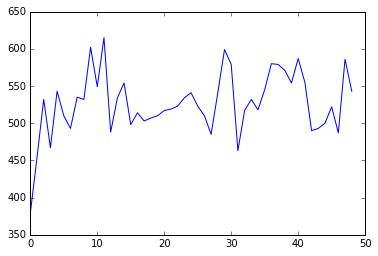

In [41]:

plt.plot(abbv)
plt.show


In [38]:
len(scoreMoyen)

166

<function matplotlib.pyplot.show>

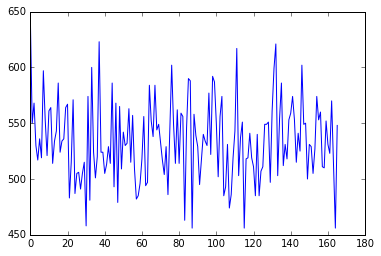

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scoreMoyen)
# plt.sh